In [1]:
#bagging的核心是通过构建多个相互独立的评估器，然后对其预测
#通过平均或者多数表决原则来决定集成评估器的结果，代表模型就是随机森林

#boosting中，基评估器是相关的，是按照顺序一一构建的，核心是通过弱评估器
#的力量一次一次对难以评估的样本进行预测，从而构成一个强评估器
#代表模型有Adaboost和梯度提升树

In [ ]:
#n_estimators  森林中树木的数量，越大越好，精确的影响性是单调的 [0,200]比较好

#bagging的本质： 
    #比如说，25棵树，在服从多数表决或者平均原则的情况下
    #只有当>=13棵树都判定错误的情况下，整个随机森林才会判断错误，而这个概率
    #为：假设每棵树判断错误的概率为p
    #随机森林判断错误的概率为：累加从i=13到25 C(25,i)p^iq^(25-i)
    #假设p=0.2，可得上值为0.000369 从而形成强分类器
    

In [4]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

In [5]:
wine = load_wine()

In [12]:
#随机森林和单决策树的比较
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(wine.data,wine.target,test_size=0.3)

In [13]:
clf = DecisionTreeClassifier(random_state=0)
rfc = DecisionTreeClassifier(random_state=0)
clf = clf.fit(Xtrain,Ytrain)
rfc = rfc.fit(Xtrain,Ytrain)
score_clf = clf.score(Xtest,Ytest)
score_rfc = rfc.score(Xtest,Ytest)
print(score_clf,score_rfc)

0.9629629629629629 0.9629629629629629


In [14]:
#交叉验证
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

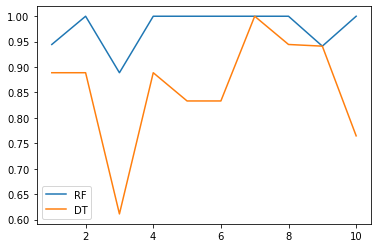

In [16]:
rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10)

clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf,wine.data,wine.target,cv=10)

plt.plot(range(1,11),rfc_s,label="RF")
plt.plot(range(1,11),clf_s,label="DT")
plt.legend()
plt.show()

0.9888888888888889 11


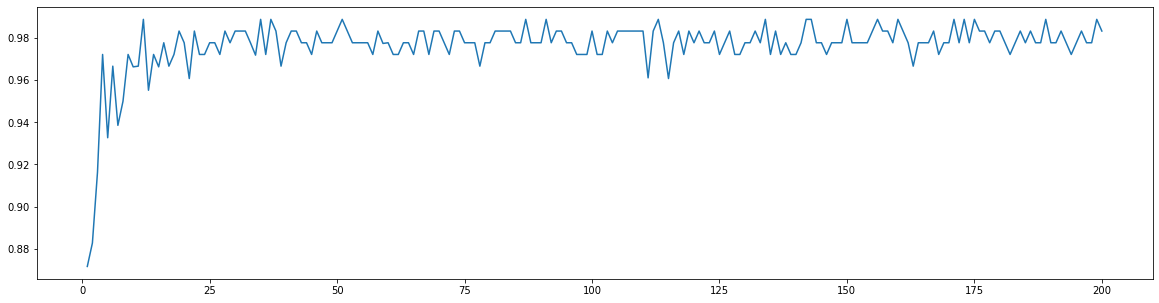

In [18]:
superpa = []
for i in range(200):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    superpa.append(rfc_s)
print(max(superpa),superpa.index(max(superpa)))
plt.figure(figsize=[20,5])
plt.plot(range(1,201),superpa)
plt.show()

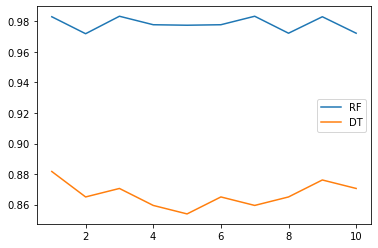

In [22]:
rfc_l = []
clf_l = []
for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    rfc_l.append(rfc_s)
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf,wine.data,wine.target,cv=10).mean()
    clf_l.append(clf_s)
plt.plot(range(1,11),rfc_l,label="RF")
plt.plot(range(1,11),clf_l,label="DT")
plt.legend()
plt.show()

In [23]:
#随机森林判错计算
import numpy as np
from scipy.special import comb

np.array([comb(25,i)*(0.2**i)*(0.8**(25-i)) for i in range(13,26)]).sum()

0.00036904803455582827

In [24]:
rfc = RandomForestClassifier(n_estimators=25,random_state=2)
rfc = rfc.fit(Xtrain,Ytrain)

In [30]:
for i in range(len(rfc.estimators_)):
    print(rfc.estimators_[i].random_state)

1872583848
794921487
111352301
1853453896
213298710
1922988331
1869695442
2081981515
1805465960
1376693511
1418777250
663257521
878959199
854108747
512264917
515183663
1287007039
2083814687
1146014426
570104212
520265852
1366773364
125164325
786090663
578016451
